In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [2]:
path = "files/youtube_files"
all_files = os.listdir(path)   # imagine you're one directory above test dir
#print(all_files)
txt_files = list(filter(lambda x: x[-4:] == '.txt', all_files))
print(txt_files)  # only text files

['A COVARDIA DO MEC NA IDEOLOGIA DE GÊNERO-ED38BZXcV9c.pt.txt', 'A POCILGA ê O LUGAR DA DILMA-TqLiy43xr70.pt.txt', 'AUTODETERMINAÇÃO DOS POVOS INDÍGENAS-tTnCTW-US7Y.pt.txt', 'BOLSONARO - MAIS UMA ESCOVADA NA MARIA DO ROSÁRIO-rxZwWwMgly8.pt.txt', 'BOLSONARO CONDENADO-hR1g_rPhFHk.pt.txt', 'BOLSONARO E A NOVA COMISSÃO DE DIREITOS HUMANOS-R87dhAeLzx8.pt.txt', 'BOLSONARO E AS COTAS-AqzUopE1l8k.pt.txt', 'BOLSONARO E PNDH3-EWzeqhITpoM.pt.txt', 'BOLSONARO ESCOVA MARIA DO ROSÁRIO-oFUsd1e-6zE.pt.txt', 'BOLSONARO, CARLOS - PERFIL-wKsB5wo6eNk.pt.txt', 'CONTRA A CULTURA DO ESTUPRA MAS NÃO CASTRA-LpeLi9aZcZM.pt.txt', 'COVARDIA DO PT COM OS PAIS E AS CRIANÄAS NAS ESCOLAS-5S5nAwQQJvY.pt.txt', 'CPI DA CENSURA À INTERNET-Rrr7wFsq2L8.pt.txt', 'DESFILIAÇÃO DO PP – O PRIMEIRO PASSO-i23AmpT7aPU.pt.txt', 'DILMA ASSALTAVA COM EX-MARIDO-oxyZB1vWD3o.pt.txt', 'DILMA E O ESTADO ISLÂMICO-HSNwvJbsmtY.pt.txt', 'DIREITOS HUMANOS DE TEMER TRABALHA CONTRA TEMER-n0KxMkE6obY.pt.txt', 'DIVIDIR PARA CONQUISTA

In [3]:
all_texts = []
name_files = []
one_text = ''
for name_file in txt_files:
    name_files.append(name_file)
    txt_path = path + '/' + name_file
    file = open(txt_path,'r',encoding='utf-8')
    lines = file.readlines()
    separator = ' '
    result = [separator.join(lines)]
    result = result[0].replace('\n', '')
    all_texts.append(result)
print(all_texts)

['o estado combativo defender-se de festa da farinha é verdade já emocionar você tem até três minutos na tribuna ser presidente eu quero na linha um pouco mais agressiva do meu companheiro vitor vale que falou sobre ideologia de gênero agora pouco o começo a palavra canalha a proposta do pt para as crianças nas escolas do ensino fundamental o pt que é transformar criancinhas this is it 67 anos de idade rpm sexuais e escancara as portas para pedofilia deixo bem claro mas aqui na câmara começou especial rejeitamos a ideologia de gênero a mesma coisa senado foi rejeitou o órgão vinculado ao mec a conferência nacional de educação orientar as coisas 6 mil prefeituras do brasil a incluir no plano decenal de educação municipal a energia do gênero é seja ensinando o filho do pobre que aquele que volta à escola pública aquele que recebe o bolsa família que ele apesar de ter um a pés ele não é um homem nem menina e nem uma coisa qualquer e mais orienta que o garoto é experiente ou seja deu um ab

In [4]:
stop_words = set(stopwords.words('portuguese'))

words = []
for text in all_texts:
    t = text.split()
    for w in t:
        if w not in stop_words and w not in ('aqui', 'para', 'de', 'que', 'agora', 'porque', 'por', 'lá', 'vai', 'pra', 'então', 'ser', 'watch', 'www', 'com', 'youtube') \
            and "www" not in w:
            words.append(w)

all = Counter(words)
print(all.most_common(50))

[('governo', 102), ('comissão', 89), ('verdade', 85), ('anos', 83), ('país', 82), ('presidente', 81), ('brasil', 78), ('hoje', 73), ('falar', 69), ('dia', 68), ('casa', 67), ('deputado', 66), ('pt', 65), ('militar', 64), ('aí', 62), ('ter', 61), ('dilma', 61), ('vamos', 59), ('projeto', 56), ('né', 55), ('fazer', 55), ('bem', 54), ('pode', 53), ('quer', 51), ('onde', 51), ('militares', 50), ('vou', 49), ('ano', 48), ('tudo', 46), ('quero', 44), ('grande', 43), ('qualquer', 42), ('todos', 42), ('filho', 41), ('presente', 41), ('exército', 40), ('democracia', 40), ('sobre', 39), ('rousseff', 39), ('questão', 39), ('gente', 39), ('família', 38), ('olha', 38), ('cuba', 38), ('coisa', 37), ('nada', 36), ('contra', 36), ('janeiro', 36), ('caso', 36), ('assim', 36)]


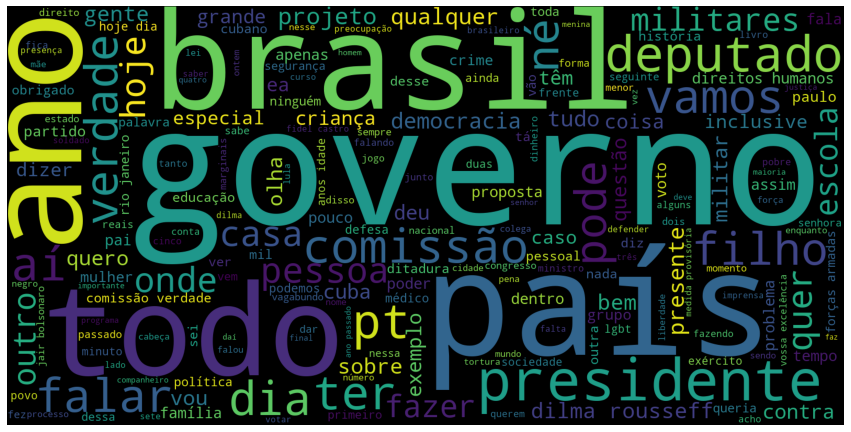

In [7]:
str_words = ' '.join([str(word) for word in words])

wordcloud = WordCloud(background_color="black",
                      width=1600, height=800).generate(str_words)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(15,11))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("files/words_from_youtube.png")